<a href="https://colab.research.google.com/github/Flotauv/English/blob/main/TP_numero_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#!pip install --user --upgrade numpy scipy pandas gensim numba typer thinc contourpy spacy

In [7]:
#!pip install spacy

In [8]:
#import sys
#!{sys.executable} -m spacy download en_core_web_sm

In [9]:
#!pip show spacy

In [10]:
!pip install gensim

In [76]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.5 MB/s eta 0:00:00


In [37]:

nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [11]:
## Stemmatisation
from nltk.stem import PorterStemmer
import nltk

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import ne_chunk
from nltk import Tree
#from gensim.models import Word2Vec
#import dataset


In [13]:
## Métriques et clustering
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, silhouette_score,davies_bouldin_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [77]:
## pyLDAviz
import pyLDAvis
import pyLDAvis.gensim_models

## Importation du Dataset

In [17]:
df = pd.read_csv("t_kjv.csv")
df

,id,b,c,v,t
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le..."
31099,66022018,66,22,18,For I testify unto every man that heareth the ...
31100,66022019,66,22,19,And if any man shall take away from the words ...
31101,66022020,66,22,20,"He which testifieth these things saith, Surely..."


### Renommage des colonnes

In [19]:
df = df.rename(columns={'t':'Texte'})
df = df.rename(columns = {'v':'Verset'})
df = df.rename(columns = {'c':'Chapitre'})
df = df.rename(columns = {'b':'Livre'})
df

,id,Livre,Chapitre,Verset,Texte
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le..."
31099,66022018,66,22,18,For I testify unto every man that heareth the ...
31100,66022019,66,22,19,And if any man shall take away from the words ...
31101,66022020,66,22,20,"He which testifieth these things saith, Surely..."


## Analyse statistique


### Analyse des Livres

In [20]:
df_livres = df.groupby('Livre')['Chapitre'].count().reset_index().sort_values(by='Chapitre',ascending=False)
df_livres

,Livre,Chapitre
18,19,2461
0,1,1533
23,24,1364
22,23,1292
3,4,1288
...,...,...
56,57,25
64,65,25
30,31,21
63,64,15


In [21]:
round(df_livres.describe(),0)

,Livre,Chapitre
count,66.0,66.0
mean,34.0,471.0
std,19.0,505.0
min,1.0,13.0
25%,17.0,86.0
50%,34.0,216.0
75%,50.0,820.0
max,66.0,2461.0


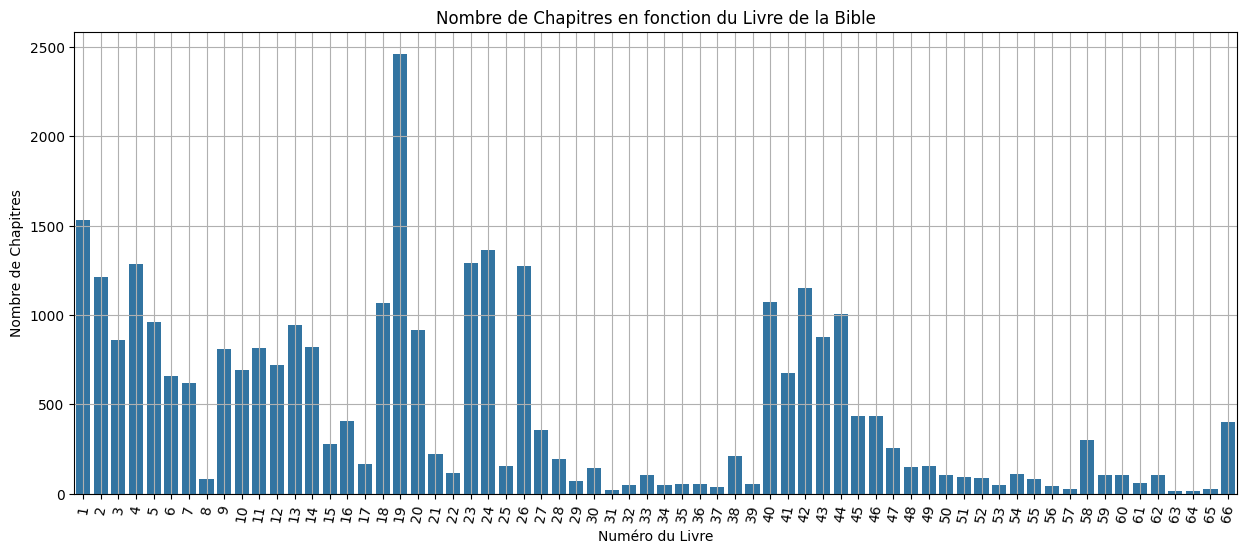

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x='Livre',
            y='Chapitre',
            data = df_livres
           )

plt.xticks(rotation=80)
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

plt.xlabel('Numéro du Livre')
plt.ylabel('Nombre de Chapitres')
plt.title('Nombre de Chapitres en fonction du Livre de la Bible')
plt.grid()
plt.show()

### Analyse des Chapitres

In [23]:
df_chapitres = df.groupby(['Livre','Chapitre'])['Verset'].count().reset_index().sort_values(by='Verset',ascending=False)
df_chapitres

,Livre,Chapitre,Verset
596,19,119,176
123,4,7,89
343,13,6,81
973,42,1,80
954,40,26,75
...,...,...,...
435,17,10,3
610,19,133,3
611,19,134,3
608,19,131,3


## Analyse des textes

### Nettoyage

In [24]:
L = []
for texte in df['Texte']:
    L.append(texte)

L

['In the beginning God created the heaven and the earth.',
 'And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.',
 'And God said, Let there be light: and there was light.',
 'And God saw the light, that it was good: and God divided the light from the darkness.',
 'And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.',
 'And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters.',
 'And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so.',
 'And God called the firmament Heaven. And the evening and the morning were the second day.',
 'And God said, Let the waters under the heaven be gathered together unto one place, and let the dry land appear: and it was so.',
 'And God called the dry land Eart

In [25]:
df['Texte'] = df['Texte'].apply(lambda x: re.sub(r"'|:|\.|\?|,|;",'',x))
#df['Texte'] = df['Texte'].apply(lambda x: re.sub(r',','',x))
#df['Texte'] = df['Texte'].apply(lambda x: re.sub(r'\.','',x))
#df['Texte'] = df['Texte'].apply(lambda x: re.sub(r'\?','',x))

In [26]:
df['Texte'] = df['Texte'].apply(lambda x: x.lower())


### Tokenisation

In [32]:
stop_words_engl = set(stopwords.words('english'))

In [35]:
df['Tokenized_words'] = df['Texte'].apply(word_tokenize)
df['Tokenized_words'] = df['Tokenized_words'].apply(lambda x: [word for word in x if word not in stop_words_engl])


In [38]:
L_pos = [pos_tag(phrase) for phrase in df['Tokenized_words']]

In [39]:
L_words = [[word for (word,element) in couple if element=='NN'] for couple in L_pos]

In [40]:
L_verbs = [[word for (word,element) in couple if element =='VB'] for couple in L_pos]

In [41]:
df['Words_contain']= L_words
df['Verbs_contain']= L_verbs


In [42]:
df['Words_contain'] = df['Words_contain'].apply(lambda x :' '.join(x))
df['Verbs_contain'] = df['Verbs_contain'].apply(lambda x: ' '.join(x))

#### Mots les plus utilisés

In [43]:
vectorizer_tuned = CountVectorizer(stop_words = 'english', max_df=1.0, min_df = 1 , analyzer = 'word')

In [44]:
X_words = vectorizer_tuned.fit_transform(df['Words_contain'])

In [45]:
df_words = pd.DataFrame(X_words.toarray(), columns=vectorizer_tuned.get_feature_names_out())

In [46]:
df_words.sum().sort_values(ascending=False).reset_index().head(20)

,index,0
0,lord,6446
1,thou,3616
2,god,3213
3,man,2613
4,thee,2214
5,son,2190
6,hath,2042
7,house,2024
8,day,1734
9,ye,1672


In [47]:
#vectorizer_tuned = CountVectorizer(stop_words = 'english',max_df = 1.0,min_df = 1, analyzer ='word')
#bow_matrix_tuned = vectorizer_tuned.fit_transform(df['Texte'])

#print(bow_matrix_tuned.shape)

In [48]:
#print(bow_matrix_tuned)

In [49]:
#df_words = pd.DataFrame(bow_matrix_tuned.toarray(), columns=vectorizer_tuned.get_feature_names_out())
#print(df_words.info())
#df_words

In [50]:
#df_words.sum().sort_values(ascending=False).head(30).reset_index()

#### Verbes les plus utilisés

In [51]:
X_verbs = vectorizer_tuned.fit_transform(df['Verbs_contain'])

In [52]:
df_verbs = pd.DataFrame(X_verbs.toarray(), columns=vectorizer_tuned.get_feature_names_out())

## Vectorisation

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the 'text' column in the DataFrame to TF-IDF representation
vectorizer = TfidfVectorizer(stop_words='english',max_features=None)
X = vectorizer.fit_transform(df['Words_contain'])

print("TF-IDF Matrix Shape:", X.shape)

TF-IDF Matrix Shape: (31103, 6696)


### K-means

#### Optimisation des paramètres (méthode du coude)

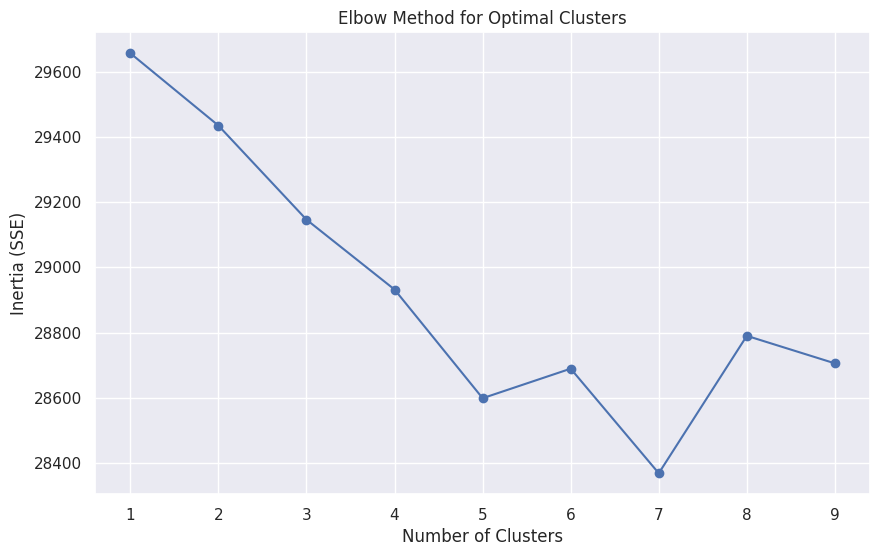

In [54]:
### La méthode du coude
import matplotlib.pyplot as plt

# Compute Inertia (Sum of Squared Errors) for different cluster sizes
inertia_values = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (SSE)")
plt.show()

In [55]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
cluster_labels = kmeans.fit_predict(X)

#print("Cluster Centers Shape:", kmeans.cluster_centers_.shape)
#print("Sample Cluster Label:", kmeans_labels[0])

In [56]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

#### Score Silhouette

In [57]:
silhouette_avg = silhouette_score(X,cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.02


In [58]:
# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X.toarray(), cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")


Davies-Bouldin Index: 4.54


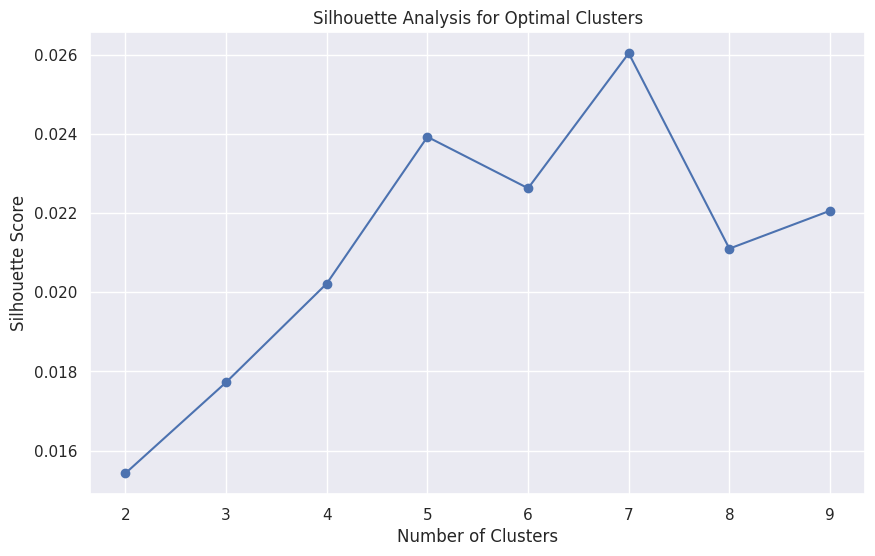

In [59]:
# L'analyse du score Silhouette
silhouette_values = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_values.append(silhouette_score(X, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_values, marker='o')
plt.title("Silhouette Analysis for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

### Conclusion

## Clustering hiérarchique

In [60]:
print(len(X.toarray()))

31103


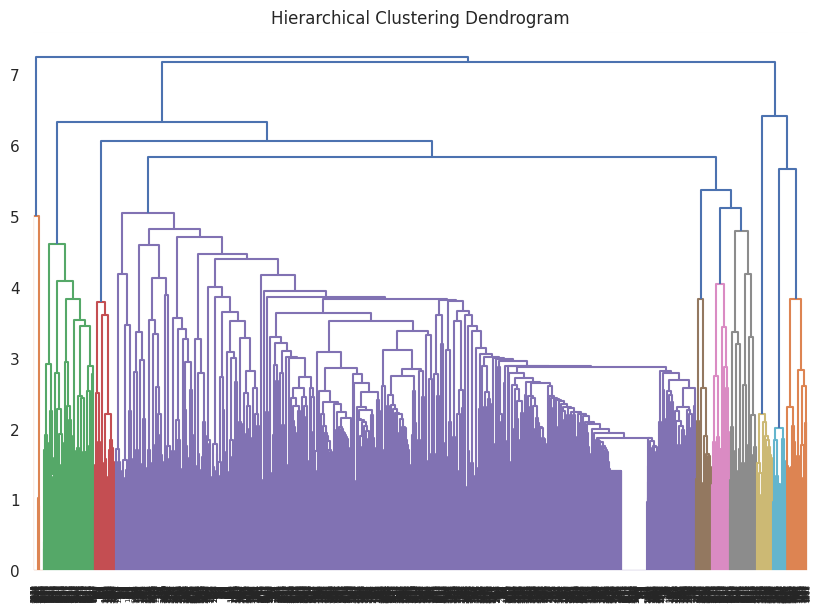

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform Hierarchical Clustering
linkage_matrix = linkage(X.toarray()[:3000], method='ward')

# Visualize Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

#### Conclusion

## Topic Modelling

### Identification des topics pour les noms communs

In [62]:
# Preprocessing: CountVectorizer for LDA
vectorizer = CountVectorizer(stop_words='english', max_features=None)
X_count = vectorizer.fit_transform(df['Words_contain'])

# Display the CountVectorizer matrix shape
print("Count Matrix Shape:", X_count.shape)

Count Matrix Shape: (31103, 6696)


In [63]:
# Apply LDA
n_topics = 3 # Number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_count)

# Display top words for each topic
terms = vectorizer.get_feature_names_out()
print("\nTop Words per Topic:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}: {[terms[i] for i in topic.argsort()[-10:]]}")


Top Words per Topic:
Topic 1: ['thee', 'saith', 'earth', 'heart', 'jesus', 'ye', 'hath', 'lord', 'man', 'god']
Topic 2: ['thine', 'offering', 'hand', 'house', 'thy', 'hast', 'shalt', 'lord', 'thee', 'thou']
Topic 3: ['king', 'pass', 'david', 'hand', 'israel', 'house', 'land', 'day', 'son', 'lord']


### Identification des topics pour les verbes

In [64]:
# Preprocessing: CountVectorizer for LDA
vectorizer = CountVectorizer(stop_words='english', max_features=None)
X_count = vectorizer.fit_transform(df['Verbs_contain'])

# Display the CountVectorizer matrix shape
print("Count Matrix Shape:", X_count.shape)

Count Matrix Shape: (31103, 1905)


In [65]:
df_verbs.sum().sort_values(ascending=False).reset_index().head(20)

,index,0
0,come,847
1,let,691
2,say,411
3,make,367
4,know,342
5,ye,260
6,eat,216
7,bring,186
8,die,136
9,fall,127


In [66]:
# Apply LDA
n_topics = 3 # Number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_count)

# Display top words for each topic
terms = vectorizer.get_feature_names_out()
print("\nTop Words per Topic:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}: {[terms[i] for i in topic.argsort()[-10:]]}")


Top Words per Topic:
Topic 1: ['tell', 'receive', 'unto', 'cut', 'offer', 'drink', 'deliver', 'die', 'eat', 'let']
Topic 2: ['kill', 'ye', 'thou', 'send', 'save', 'stand', 'god', 'know', 'make', 'say']
Topic 3: ['set', 'israel', 'lord', 'turn', 'hear', 'thee', 'live', 'dwell', 'remember', 'fall']
Topic 4: ['cast', 'bear', 'thy', 'spake', 'speak', 'return', 'love', 'bring', 'ye', 'come']


### Proportion des topics dans chaque document

On part sur 3 topics majoritairement présents dans notre corpus

In [68]:
# Preprocessing: CountVectorizer for LDA
vectorizer = CountVectorizer(stop_words='english', max_features=None)
X_count = vectorizer.fit_transform(df['Texte'])

# Display the CountVectorizer matrix shape
print("Count Matrix Shape:", X_count.shape)

Count Matrix Shape: (31103, 12459)


In [79]:
n_topics = 4 # Number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_count)

# Display top words for each topic
terms = vectorizer.get_feature_names_out()
print("\nTop Words per Topic:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}: {[terms[i] for i in topic.argsort()[-10:]]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Top Words per Topic:
Topic 1: ['earth', 'let', 'things', 'man', 'hath', 'unto', 'lord', 'god', 'ye', 'shall']
Topic 2: ['god', 'came', 'saying', 'shalt', 'lord', 'thee', 'said', 'thy', 'thou', 'unto']
Topic 3: ['went', 'unto', 'lord', 'years', 'king', 'did', 'sons', 'israel', 'children', 'son']
Topic 4: ['israel', 'king', 'people', 'offering', 'thereof', 'day', 'unto', 'house', 'lord', 'shall']


In [73]:
# Transform documents into topic distributions
doc_topic_dists = lda.transform(X_count)

# Display the topic distribution for the first 5 documents
print("\nDocument-Topic Distribution for First 5 Documents:")
pd.DataFrame(doc_topic_dists).head(30)


Document-Topic Distribution for First 5 Documents:


,0,1,2
0,0.887510,0.056666,0.055825
1,0.941826,0.029077,0.029097
2,0.710360,0.233877,0.055763
3,0.912649,0.042673,0.044678
4,0.448646,0.520269,0.031085
5,0.850424,0.109642,0.039934
6,0.838056,0.042017,0.119928
7,0.475782,0.481497,0.042722
8,0.598897,0.368202,0.032901
9,0.774741,0.195508,0.029751


### Visualisation des topics

In [80]:
doc_lengths = [len(doc.split()) for doc in df['Texte']]  # Length of each document
vocab = vectorizer.get_feature_names_out()  # Vocabulary terms
term_frequency = X_count.toarray().sum(axis=0)  # Term frequencies in the entire corpus
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, None]  # Topic-term distributions
doc_topic_dists = lda.transform(X_count)  # Document-topic distributions

# Step 5: Visualize topics using pyLDAvis
lda_vis = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists,
    doc_topic_dists=doc_topic_dists,
    doc_lengths=doc_lengths,
    vocab=vocab,
    term_frequency=term_frequency
)

pyLDAvis.enable_notebook()
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


On remarque que 3 ou 4 topics se distinguent

4 topics : Les distributions sont plutôt similaires pour 3 d'entre eux tandis que le quatrième a une distribution plus faible. (à continuer )

3 topics (à continuer )